In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy as sp
import os
import pandas as pd
from scipy import stats
path = r'C:\Users\reape\Desktop\Sp24\NPRE 451\Lab 9\\'
save_path = path[:-5]+'Lab9Delivs/'
if os.path.exists(save_path) == False:
    os.mkdir(save_path)
files = sorted(os.listdir(path))
e2_files = files[1:-1]      #['cf10mbare.txt','cf10mlead.txt','cf10mplas1.txt','cf10mplas2.txt','cf10mplas3.txt','cs137.txt','na22.txt']
e1_files = np.array([files[0],files[-1]])    #array(['background.Spe', 'pube.Spe'], dtype='<U14')

import matplotlib as mpl
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)

In [4]:
def D(path):
    assert(os.path.exists(path)==True)
    D2 = {}
    D1 = {}
    for file in e2_files:
        data = np.array(pd.read_csv(path+file))
        D2[file] = data
    for file in e1_files:
        data = np.array(pd.read_csv(path+file,header = 11,skipfooter = 14,engine = 'python'))
        D1[file] = data
    return D1,D2
#D,keys = D(path)
#keys = sorted(keys)
#e2n_keys = keys[1:-3]
#e2g_keys = keys[-3:-1]
D1,D2 = D(path)



Experiment 1, Deliverable 1:



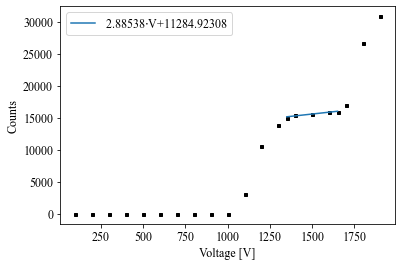





Experiment 1, Deliverable 2:



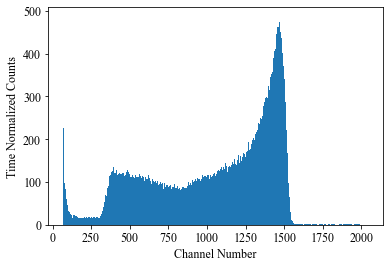





Experiment 2, Deliverable 1:



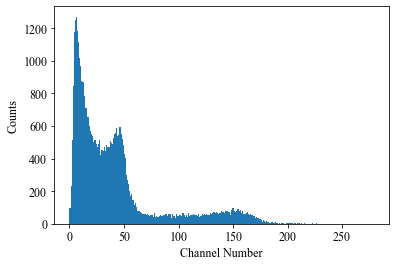

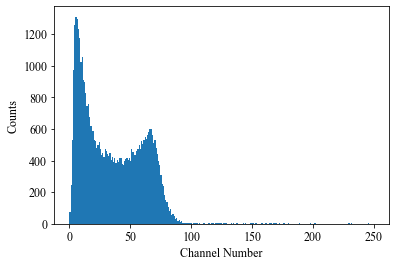





Experiment 2, Deliverable 2:

The Maximum Energy Deposited by a Compton Scatter for 511, 661.7, and 1200 keV are [340.66666667 477.3734082  989.35073858], Respectively




Experiment 2, Deliverable 3:



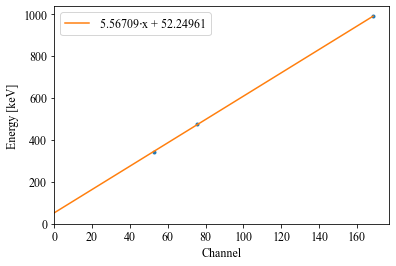





Experiment 2, Deliverable 4:

basically linear lol




Experiment 2.2, Deliverable 1:

cf10mbare.txt: Bare $^{252}$Cf
cf10mlead.txt: 0.6 cm Lead
cf10mplas1.txt: 7 cm Polyethylene
cf10mplas2.txt: 4 cm Polyethylene
cf10mplas3.txt: 1 cm Polyethylene


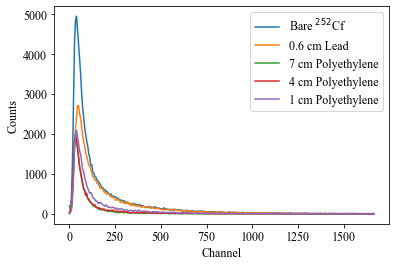



The Ratio of Counts from .6cm  Lead to 1 cm of Polyethylene is 1.9345511698941313




Experiment 2.2, Deliverable 2:

cf10mbare.txt: Bare $^{252}$Cf
cf10mlead.txt: 0.6 cm Lead
cf10mplas1.txt: 7 cm Polyethylene
cf10mplas2.txt: 4 cm Polyethylene
cf10mplas3.txt: 1 cm Polyethylene


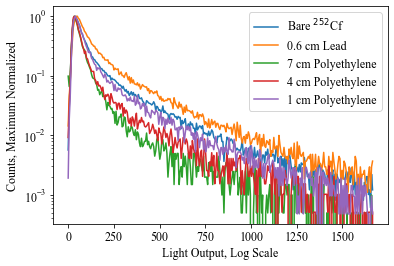

In [15]:
#Counting Curve
print('\n')
print('\033[1m'+'Experiment 1, Deliverable 1:')
print('\033[0m')
voltage = np.array([100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1350,1400,1500,1600,1650,1700,1800,1900])
counts = np.array([0,0,0,0,0,0,0,1,1,30,3094,10553,13954,14991,15537,15639,15896,16002,16955,26779,30897])
y,x = counts[13:18],voltage[13:18]
m,b,r,p,stderr = sp.stats.linregress(x,y)
plt.plot(voltage,counts,'s',color = 'k',ms = 3)
plt.plot(x,m*x+b, label = '{}$\cdot$V+{}'.format(np.around(m,5),np.around(b,5)))
plt.xlabel('Voltage [V]')
plt.ylabel('Counts')
plt.legend()
plt.savefig(save_path+'Calib_curve.png',dpi=600)
plt.show()

print('\n\n\n')
print('\033[1m'+'Experiment 1, Deliverable 2:')
print('\033[0m')
y = (D1[e1_files[1]]-D1[e1_files[0]])[75:]/5
x = np.arange(0,len(y))+70

plt.hist(x,bins = len(x),weights = y)
plt.xlabel('Channel Number')
plt.ylabel('Time Normalized Counts') #background subtracted as well 
plt.savefig(save_path+'ThermalSpectrum.png',dpi = 600)
plt.show()


print('\n\n\n')
print('\033[1m'+'Experiment 2, Deliverable 1:')
print('\033[0m')
for i in range(2):
    key = e2_files[-(i+1)]
    y = D2[key]
    loc = np.where(y ==0)[0][50]
    y = y[:loc]
    x = np.arange(0,len(y))
    plt.hist(x,bins = len(x),weights = y)
    plt.ylabel('Counts')
    plt.xlabel('Channel Number')
    plt.savefig(save_path+'e2d1'+'{}.png'.format(key[:-4]), dpi=600)
    plt.show()


print('\n\n\n')
print('\033[1m'+'Experiment 2, Deliverable 2:')
print('\033[0m')
def compton_energy(e):
    '''
    takes in an input energy and returns compton energy
    '''
    ener = e/(1+e/511*2)
    return e-ener
maxcomp_ener = compton_energy(np.array([511,661.7,1200]))
print('The Maximum Energy Deposited by a Compton Scatter for 511, 661.7, and 1200 keV are {}, Respectively'.format(maxcomp_ener))

print('\n\n\n')
print('\033[1m'+'Experiment 2, Deliverable 3:')
print('\033[0m')
channels = np.array([52.5,75.5,168.5])
m,b,r,p,stderr = sp.stats.linregress(channels,maxcomp_ener)
plt.plot(channels,maxcomp_ener,'.')
x = np.array([0,52.5,75.5,168.5])
plt.plot(x,x*m+b,label = '{}$\cdot$x + {}'.format(np.around(m,5),np.around(b,5)))
plt.xlim(left = 0)
plt.ylim(bottom=0)
plt.ylabel('Energy [keV]')
plt.xlabel('Channel')
plt.legend()
plt.savefig(save_path+'exp2e1.png',dpi = 600)
plt.show()

print('\n\n\n')
print('\033[1m'+'Experiment 2, Deliverable 4:')
print('\033[0m')
print('basically linear lol')
print('\n\n\n')
print('\033[1m'+'Experiment 2.2, Deliverable 1:')
print('\033[0m')
names = ['Bare $^{252}$Cf','0.6 cm Lead','7 cm Polyethylene','4 cm Polyethylene','1 cm Polyethylene' ]
for i in range(len(e2_files[:-2])):
    y = D2[e2_files[i]][:300]
    x = np.arange(0,len(y))*m
    print(e2_files[i]+ ':',names[i])
    plt.plot(x, y, label = names[i])
    plt.xlabel('Channel')
    plt.ylabel('Counts')
    if i == 1:
        ratio = sum(y)
    if i == 4:
        ratio = ratio / sum(y)
plt.legend()
plt.savefig(save_path+'exp2part2d1.png',dpi = 600)
plt.show()
print("\n")
print('The Ratio of Counts from .6cm  Lead to 1 cm of Polyethylene is {}'.format(ratio[0]))

print('\n\n\n')
print('\033[1m'+'Experiment 2.2, Deliverable 2:')
print('\033[0m')
for i in range(len(e2_files[:-2])):
    y = D2[e2_files[i]][:300]
    y = y/(max(y)[0])
    x = np.arange(0,len(y))*m
    print(e2_files[i]+ ':',names[i])
    plt.plot(x, y, label = names[i])
    plt.xlabel('Light Output, Log Scale')
    plt.ylabel('Counts, Maximum Normalized')

plt.legend()
plt.yscale('log')
plt.savefig(save_path+'exp2part2d2.png',dpi=600)
plt.show()